<a href="https://colab.research.google.com/github/RUYUFALBARRAK/SWE485-project-Group-7/blob/master/SupervisedLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn import preprocessing as pre
import numpy as np

data = pd.read_csv('heartpreprocessed.csv')

In [6]:
from sklearn.model_selection import train_test_split 
# target Y , features X
X= data[['age' , 'sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' ,
         'exng' , 'oldpeak' , 'slp' ,'caa' , 'thall']]
Y = data['output']
# train_test splitting that data to 80/20 train/test
x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size=0.3 , random_state = 2)


In [7]:
from sklearn.metrics import accuracy_score , classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
#  decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion="entropy" , random_state = 100 , max_depth=5)
# performing training 
clf_entropy.fit(x_train , y_train )
# predicton on test with entropy 
y_pred = clf_entropy.predict(x_test)

print("Accuracy :" ,accuracy_score(y_test , y_pred)*100)

print("Report :" ,classification_report(y_test , y_pred))

score= cross_val_score(clf_entropy , X , Y , cv=5)

print('Cross validation score :' , score)

Accuracy : 86.81318681318682
Report :               precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       0.84      0.94      0.88        49

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91

Cross validation score : [0.73770492 0.86885246 0.73333333 0.78333333 0.63333333]


In [8]:
# Train Accuracy 
data_train_accurcy= clf_entropy.score(x_train , y_train)
print("Training accuracy =" , data_train_accurcy)
# Test Accuracy 
data_test_accurcy = clf_entropy.score(x_test , y_test)
print("Testing accuracy =" , data_test_accurcy)

Training accuracy = 0.909952606635071
Testing accuracy = 0.8681318681318682


[Text(0.5036764705882353, 0.9166666666666666, 'cp <= 0.5\nentropy = 0.994\nsamples = 211\nvalue = [96, 115]\nclass = 1'),
 Text(0.23529411764705882, 0.75, 'caa <= 0.5\nentropy = 0.863\nsamples = 105\nvalue = [75, 30]\nclass = 0'),
 Text(0.11764705882352941, 0.5833333333333334, 'thall <= 2.5\nentropy = 1.0\nsamples = 49\nvalue = [24, 25]\nclass = 1'),
 Text(0.058823529411764705, 0.4166666666666667, 'thalachh <= 121.0\nentropy = 0.837\nsamples = 30\nvalue = [8, 22]\nclass = 1'),
 Text(0.029411764705882353, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.08823529411764706, 0.25, 'exng <= 0.5\nentropy = 0.75\nsamples = 28\nvalue = [6, 22]\nclass = 1'),
 Text(0.058823529411764705, 0.08333333333333333, 'entropy = 0.323\nsamples = 17\nvalue = [1, 16]\nclass = 1'),
 Text(0.11764705882352941, 0.08333333333333333, 'entropy = 0.994\nsamples = 11\nvalue = [5, 6]\nclass = 1'),
 Text(0.17647058823529413, 0.4166666666666667, 'slp <= 1.5\nentropy = 0.629\nsamples = 19\nvalue = 

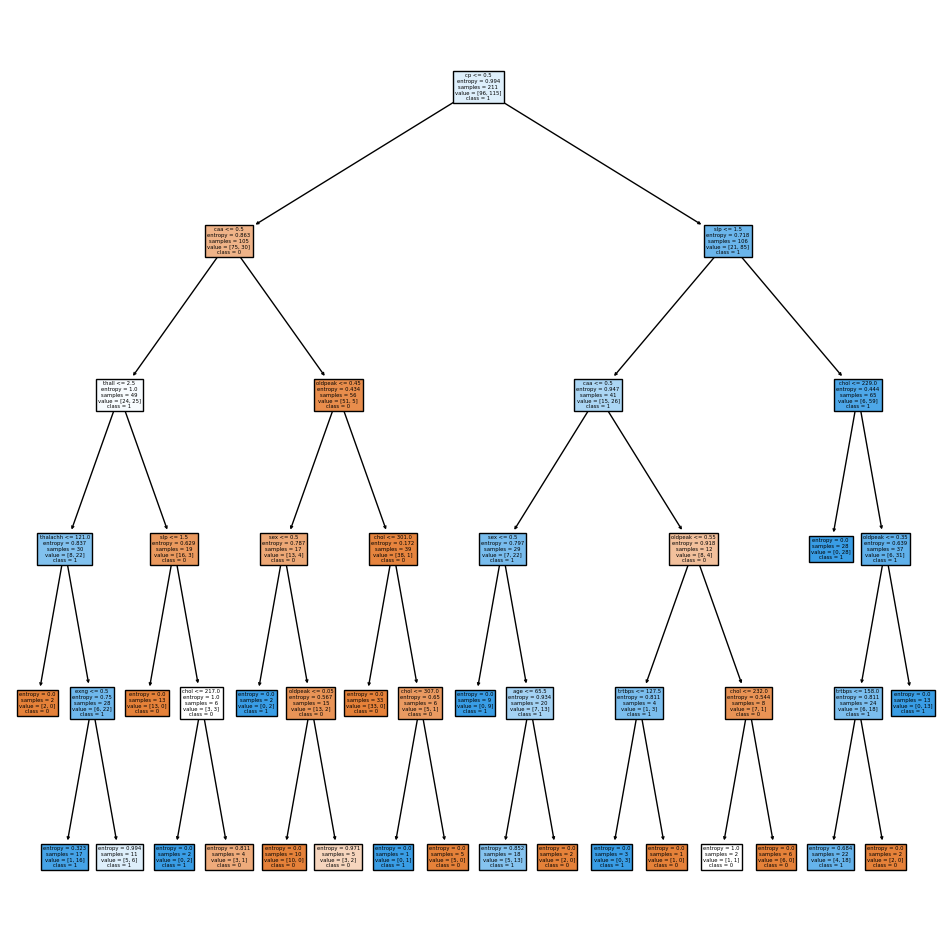

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(clf_entropy ,
               feature_names = ['age' , 'sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' ,
         'exng' , 'oldpeak' , 'slp' ,'caa' , 'thall'],
         class_names=['0' , '1'],
         filled= True )

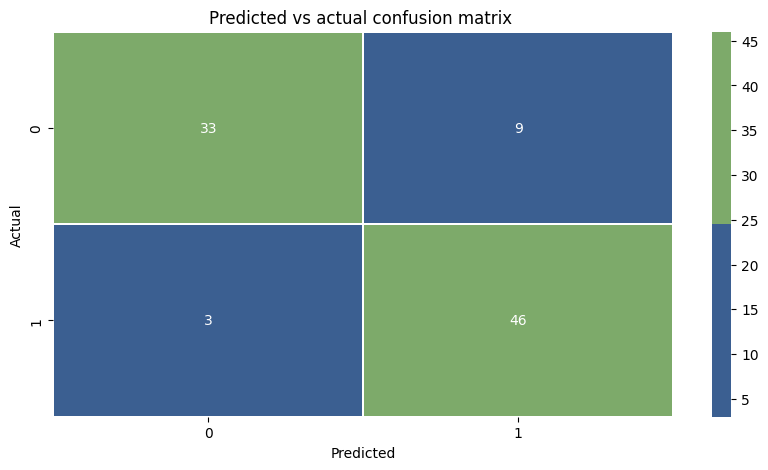

In [11]:
import seaborn as sns
# confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred = clf_entropy.predict(x_test)
y_true = y_test 
ab = ['#3b5f91' , '#7daa6a'  ]
cm_dt = confusion_matrix(y_true , y_pred)
f , ax = plt.subplots(figsize=(10 , 5))
sns.heatmap(cm_dt , annot = True , linewidth = 0.1 , fmt =".0f" , cmap=ab , ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs actual confusion matrix ")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split 
# target Y , features X
X= data[['age' , 'sex' , 'cp' , 'trtbps' , 'chol' , 'fbs' , 'restecg' , 'thalachh' ,
         'exng' , 'oldpeak' , 'slp' ,'caa' , 'thall']]
Y = data['output']
# train_test splitting that data to 80/20 train/test
x_train , x_test , y_train , y_test = train_test_split(X ,Y , test_size=0.3, random_state = 2)

In [13]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
295,63,0,0,124,197,0,1,136,1,0.0,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
296,59,1,0,164,176,1,0,90,0,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
172,58,1,2,132,224,0,0,173,0,3.2,2,2,3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

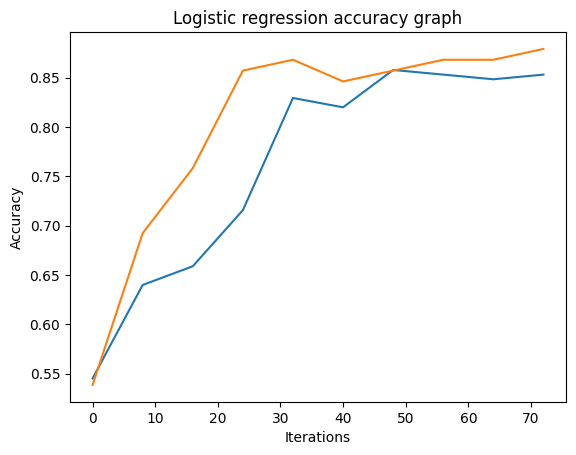

In [14]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Train and validation errors initialized as empty list
train_score = []
test_score = []

# Loop for taking average result
Array=8*(np.arange(10))
for i in Array:
    # Create LogisticRegression object and fit
    lr = LogisticRegression( max_iter=i)
    lr.fit(x_train, y_train)
    
    # Evalueate error rates and append to lists
    train_score.append( lr.score(x_train, y_train))
    test_score.append(lr.score(x_test, y_test))
    
# Plot results
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.title('Logistic regression accuracy graph')
plt.plot(Array,train_score)
plt.plot(Array,test_score)

In [15]:
from sklearn import metrics
y_pred=lr.predict(x_test)
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[33,  9],
       [ 2, 47]])

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

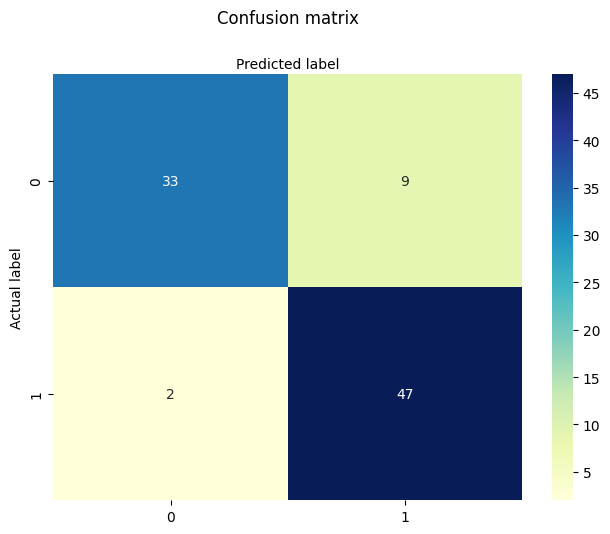

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        35
           1       0.96      0.84      0.90        56

    accuracy                           0.88        91
   macro avg       0.87      0.89      0.88        91
weighted avg       0.89      0.88      0.88        91



In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8791208791208791
